## Patch extraction

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Running in Colab
X = np.load('/content/drive/MyDrive/Colab Notebooks/data/X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/data/Y.npy')

In [5]:
X.shape

(5547, 50, 50, 3)

In [6]:
y.shape

(5547,)

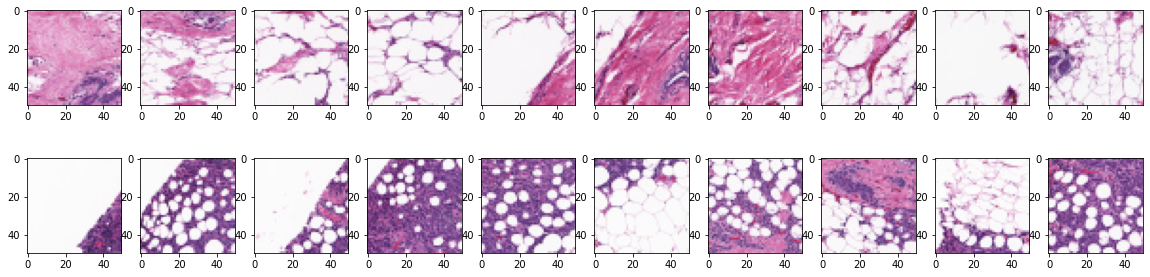

In [7]:
neg = X[y==0]
pos = X[y==1]

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(neg[i])
    plt.subplot(2, n, n + i + 1)
    plt.imshow(pos[i])

Test with a fake image

In [2]:
from sklearn.datasets import load_sample_images
from sklearn.feature_extraction import image
# Use the array data from the second image in this dataset:
X = load_sample_images().images[1]
print('Image shape: {}'.format(X.shape))

Image shape: (427, 640, 3)


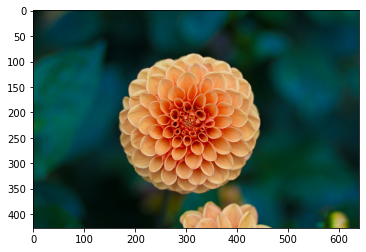

In [3]:
plt.imshow(X)

In [4]:
X.shape

(427, 640, 3)

In [54]:
def create_img_array(image):
    # Convert image to nparray
    X = asarray(image)
    # Get image dimensions
    height = X.shape[0]
    width = X.shape[1]
    # Pad image with white so its dimensions are multiples of 50. Assumes an RGB image
    pad_height = int(np.ceil(height/50))*50
    pad_width = int(np.ceil(width/50))*50
    pad = np.ones((pad_height,pad_width,3), dtype=np.uint8)*255
    pad[:height, :width, :] = X
    # Create an array of 50 x 50 images
    img_array = np.zeros((int(pad_height/50) * int(pad_width/50), 50, 50, 3), dtype=np.uint8)
    for h in range(int(pad_height/50)):
        for w in range(int(pad_width/50)):
            img_array[h*int(pad_width/50)+w,:,:,:] = pad[h*50:(h+1)*50, w*50:(w+1)*50, :]
    return img_array

In [5]:
# Get image dimensions
height = X.shape[0]
width = X.shape[1]

In [34]:
# Pad image so its dimensions are multiples of 50. Assumes an RGB image
pad_height = int(np.ceil(height/50))*50
pad_width = int(np.ceil(width/50))*50
pad = np.ones((pad_height,pad_width,3), dtype=np.uint8)*255
pad[:height, :width, :] = X

In [36]:
pad.shape

(450, 650, 3)

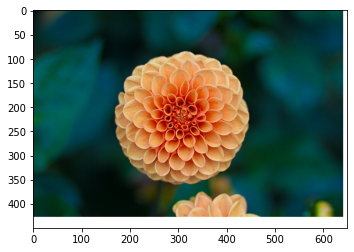

In [37]:
plt.imshow(pad)

In [9]:
int(5.6)

5

In [38]:
# Create an array of 50 x 50 images
img_array = np.zeros((int(pad_height/50) * int(pad_width/50), 50, 50, 3), dtype=np.uint8)

for h in range(int(pad_height/50)):
    for w in range(int(pad_width/50)):
        img_array[h*int(pad_width/50)+w,:,:,:] = pad[h*50:(h+1)*50, w*50:(w+1)*50, :]

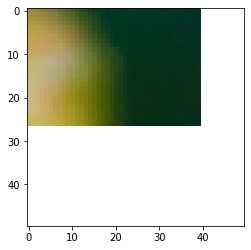

In [40]:
plt.imshow(img_array[116]);

In [16]:
img_array[1].shape

(50, 50, 3)

In [17]:
img_array.shape

(117, 50, 50, 3)

## Test with full-size biopsy image

In [69]:
image = Image.open('../idc/data/10253_idx5.png')

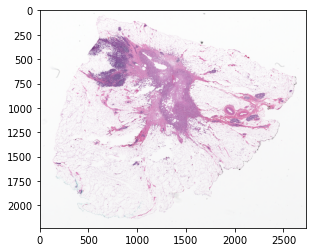

In [70]:
plt.imshow(image)

In [76]:
img_data = np.asarray(image)

In [77]:
img_data.shape

(2230, 2731, 3)

In [71]:
data= create_img_array(image)

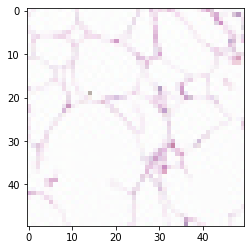

In [72]:
plt.imshow(data[300])

In [73]:
data.shape

(2475, 50, 50, 3)

## Reconstitute image from image array

In [85]:
def create_img_from_array(array, pad_height, pad_width):
    # Create an array of 255 that is the same size as the padded image
    new_img_array = np.ones((pad_height, pad_width, 3), dtype=np.uint8)*255
    width_div_50 = int(pad_width/50)
    for h in range(int(pad_height/50)):
        for w in range(int(pad_width/50)):
             new_img_array[h*50:(h+1)*50, w*50:(w+1)*50, :] = array[h*width_div_50+w]
    return new_img_array

In [86]:
new_img_array = create_img_from_array(data, 2250, 2750)

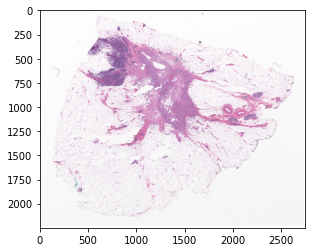

In [87]:
plt.imshow(new_img_array)